## Transformaciónes de Box-Plot

In [4]:
import faraway.utils
import faraway.datasets.savings

savings=faraway.datasets.savings.load()
savings

,sr,pop15,pop75,dpi,ddpi
Australia,11.43,29.35,2.87,2329.68,2.87
Austria,12.07,23.32,4.41,1507.99,3.93
Belgium,13.17,23.80,4.43,2108.47,3.82
Bolivia,5.75,41.89,1.67,189.13,0.22
Brazil,12.88,42.19,0.83,728.47,4.56
Canada,8.79,31.72,2.85,2982.88,2.43
Chile,0.60,39.74,1.34,662.86,2.67
China,11.90,44.75,0.67,289.52,6.51
Colombia,4.98,46.64,1.06,276.65,3.08
Costa Rica,10.78,47.64,1.14,471.24,2.80


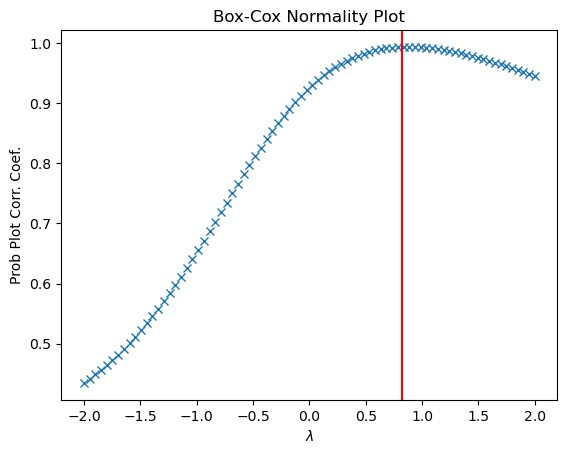

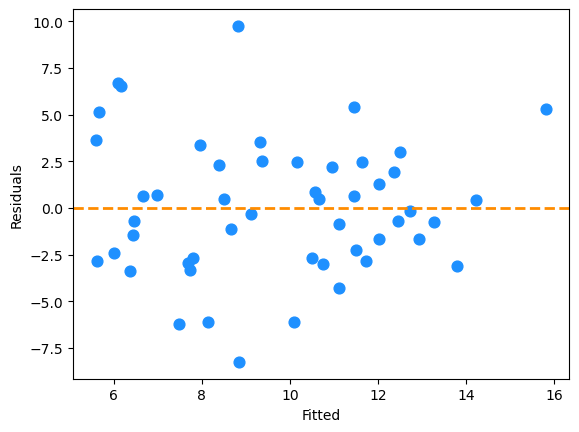

In [25]:
import statsmodels.formula.api as smf
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

dependent_var='sr'
independent_vars=savings.columns.tolist() #Guarda todas las columnas en text
independent_vars.remove(dependent_var) #Elimina la columna sr

formula=dependent_var+' ~ '+'+'.join(independent_vars)
savings_model=smf.ols(formula=formula,data=savings).fit()

shifted_resid=savings_model.resid-np.min(savings_model.resid)+1 #
shifted_resid


# Shift residuals to be positive
shifted_resid = savings_model.resid - np.min(savings_model.resid) + 1  # shift to make all values positive

fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(shifted_resid, -2, 2, plot=ax)
_, maxlog = stats.boxcox(shifted_resid)
ax.axvline(maxlog, color='r')
plt.show()

# Fitted vs Residuals Plot
plt.scatter(savings_model.fittedvalues, savings_model.resid, color='dodgerblue', s=60)
plt.axhline(y=0, linestyle='--', color='darkorange', linewidth=2)
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()

In [49]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr
np.random.seed(42)

def gen_exact_collin_data(num_samples=100):
    x1 = np.random.normal(loc=80, scale=10, size=num_samples)
    x2 = np.random.normal(loc=70, scale=5, size=num_samples)
    x3 = 2 * x1 + 4 * x2 + 3
    y = 3 + x1 + x2 + np.random.normal(loc=0, scale=1, size=num_samples)
    return pd.DataFrame({'y': y, 'x1': x1, 'x2': x2, 'x3': x3})
exact_collin_data = gen_exact_collin_data()
print(exact_collin_data.head())
X = sm.add_constant(exact_collin_data.drop(columns='y'))
model = sm.OLS(exact_collin_data['y'], X).fit()
print(model.summary())


residuals=model.resid
hat_values=model.get_influence().hat_matrix_diag
print(hat_values)




            y         x1         x2          x3
0  151.248075  84.967142  62.923146  424.626868
1  150.074915  78.617357  67.896773  431.821808
2  158.846364  86.476885  68.286427  449.099480
3  165.272714  95.230299  65.988614  457.415052
4  148.474368  77.658466  69.193571  435.091218
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     4146.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):           1.15e-94
Time:                        17:48:52   Log-Likelihood:                -147.62
No. Observations:                 100   AIC:                             301.2
Df Residuals:                      97   BIC:                             309.1
Df Model:                           2                                         
C

In [63]:
# Outliers for model_1 (standardized residuals > 2)


std_residuals_1 = model.get_influence().resid_studentized_internal
print(std_residuals_1)
outliers_1 = np.where(np.abs(std_residuals_1) > 2)[0]
print(outliers_1)


print(std_residuals_1[84])

### Econtramos los valores de apalancamiento y asi miramos si los queremos eliminar dadas las concidiones que le pusimos


[ 0.13204335  0.46625452  0.79176604  0.58188022 -1.32343804 -0.90614443
  0.09042413  0.23843746  0.50125354  3.41174516  0.5395142   1.07764935
  0.75902959  1.00763739 -0.01550261  0.75003671 -0.59477211 -0.38731386
 -0.33482954  0.30452442  1.81844382 -1.80044999  0.5669752  -1.34017455
 -0.40327979  0.96401899  0.21220115 -1.17967458 -0.62435977  0.6094481
 -0.66763702 -0.27802811 -0.04993508 -0.46586799  1.75271312  0.80034824
 -2.03695539  0.51406209 -0.41622233  0.66416713 -0.98203355 -0.21358034
  0.40131408  0.79241557 -0.89997162 -0.23559728 -0.44843828 -0.94763814
  1.50535102  0.68343117 -1.32921911  0.86127242  2.04744172  0.75844866
 -1.73333837 -0.74696076  1.32778977 -0.67442752  0.25051425  0.44742689
 -0.86545766 -0.09053323 -2.90006443 -0.80765834 -0.48535267 -1.55498064
  1.47313195 -1.66271667 -0.57433479  0.16803863  1.1842045  -1.79337087
  1.01115206 -0.40786986 -0.46198679  0.18681745  0.08497787 -0.57063325
 -0.04007076  0.00872635  0.07700789  0.45306372  1.

In [34]:
residuals = model.resid

n=len(residuals)


In [45]:
def qq_plot(residuals):
    n = len(residuals)
    normal_quantiles = norm.ppf((np.arange(1, n + 1) - 0.5) / n)
    sorted_residuals = np.sort(residuals)

    plt.scatter(normal_quantiles, sorted_residuals, color='darkgrey')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title('Normal Q-Q Plot')
    
    # Calculate line through the first and third quartiles
    slope, intercept = np.polyfit(
        norm.ppf([0.25, 0.75]), 
        np.quantile(residuals, [0.25, 0.75]), 
        deg=1
    )
    
    x = np.linspace(min(normal_quantiles), max(normal_quantiles), 100)
    plt.plot(x, intercept + slope * x, 'dodgerblue', linestyle='dashed', linewidth=2)
    plt.show()

## QQ Plot from the beggining

In [14]:
import sklearn.linear_model as LinearRegression
import numpy as np
import pandas as pd
import statsmodels.api as sm

np.random.seed(42)
sample_size=500
x=np.random.uniform(low=0,high=5,size=sample_size)
y=3+5*5*x+np.random.normal(loc=0,scale=1,size=sample_size)
data=pd.DataFrame({'x':x,'y':y})
data

## Creamos unos datos uniformes en el intervalo de 0 a 1 y miramos una ecuaci lineal


sim_data_1=data
X=sm.OLS(sim_data_1['y'],sm.add_constant(sim_data_1['x'])).fit()
model=sm.OLS(sim_data_1['y'],sm.add_constant(sim_data_1['x'])).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 6.902e+05
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:08:11   Log-Likelihood:                -711.32
No. Observations:                 500   AIC:                             1427.
Df Residuals:                     498   BIC:                             1435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8929      0.088     33.032      0.0